# Predicting whether a passenger survived or not using Titanic dataset

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Uploading the dataset

In [2]:
df = pd.read_csv("D://tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df.shape

(418, 12)

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
duplicated_rows = df[df.duplicated()]
print("Number of duplicated rows are :",duplicated_rows.shape)

Number of duplicated rows are : (0, 12)


In [7]:
print("Number of passengers in data :",len(df.index))

Number of passengers in data : 418


### Data Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

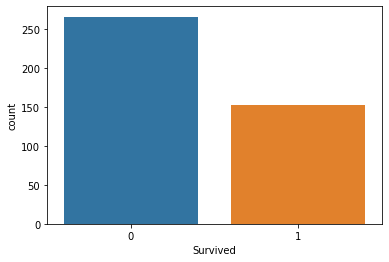

In [8]:
sns.countplot(x='Survived',data=df)

#### From the graph we can visualize that out of the total number of passengers who boarded the ship , maximum of them died .

<AxesSubplot:xlabel='Survived', ylabel='count'>

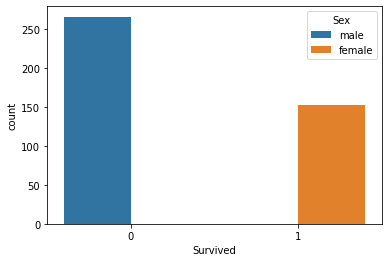

In [9]:
sns.countplot(x='Survived',hue='Sex',data=df)

#### From the bar plot we can visualize that all the females survived and all the males died . 

<AxesSubplot:xlabel='Survived', ylabel='count'>

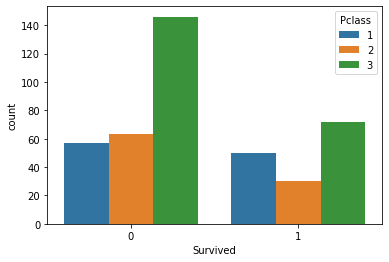

In [10]:
sns.countplot(x='Survived',hue='Pclass',data=df)

#### From the bar plot we can visualize that out of people who died , most of them were of 3rd class . 

<AxesSubplot:ylabel='Frequency'>

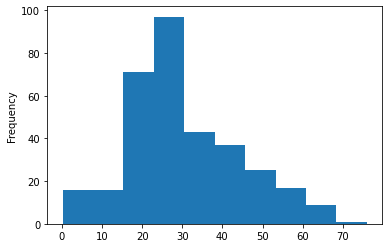

In [11]:
df['Age'].plot.hist()

#### The above histogram depicts that most of the people who boarded the ship had their age between 15 - 30 .

<AxesSubplot:ylabel='Frequency'>

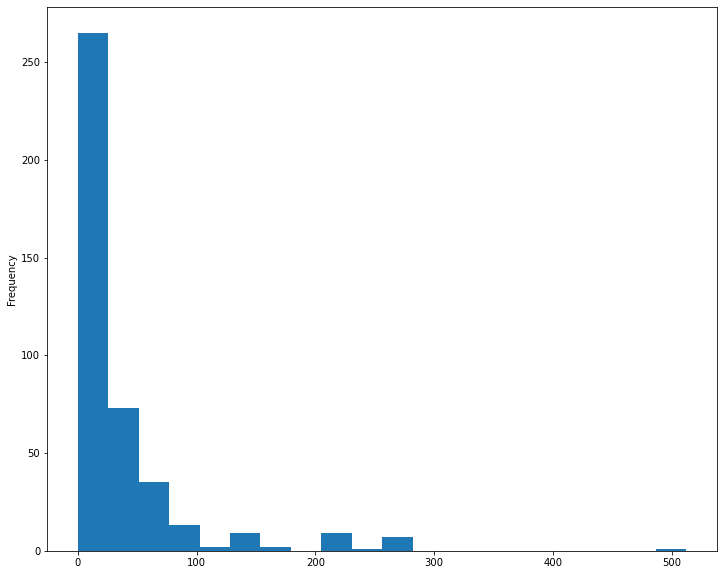

In [12]:
df['Fare'].plot.hist(bins=20,figsize=(12,10))

<AxesSubplot:xlabel='SibSp', ylabel='count'>

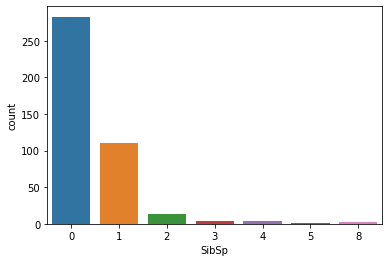

In [13]:
sns.countplot(x='SibSp',data=df)

#### From the bar plot we can visualize that most of the passengers were travelling alone in the ship .  

### Data Analysis

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

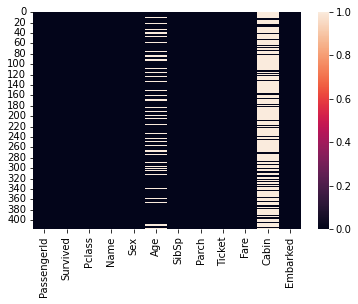

In [15]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

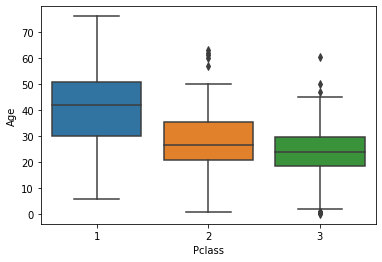

In [16]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
df.drop('Cabin',axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [19]:
df.dropna(inplace=True)

<AxesSubplot:>

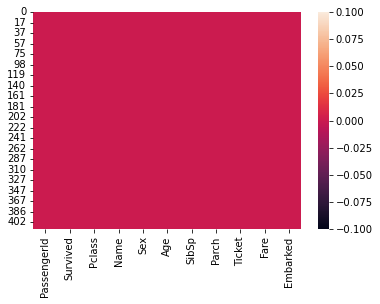

In [20]:
sns.heatmap(df.isnull())

In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Creating dummy values for required columns

In [22]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,1
3,1
4,0


In [23]:
embark = pd.get_dummies(df['Embarked'],drop_first=True)
embark.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [24]:
pclass = pd.get_dummies(df['Pclass'],drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


#### adding the created dummy columns into the dataset

In [25]:
df1 = pd.concat([df,sex,embark,pclass],axis=1)
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1


#### droping the unwanted columns

In [26]:
df1.drop(['Pclass','Sex','Embarked'],axis=1,inplace=True)
df1.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S,2,3
0,892,0,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,1,0,0,1
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,1,0,1
2,894,0,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,1,0,1,0
3,895,0,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,0,1,0,1
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,1,0,1


In [27]:
df1.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [28]:
df1.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,34.5,0,0,7.8292,1,1,0,0,1
1,1,47.0,1,0,7.0000,0,0,1,0,1
2,0,62.0,0,0,9.6875,1,1,0,1,0
3,0,27.0,0,0,8.6625,1,0,1,0,1
4,1,22.0,1,1,12.2875,0,0,1,0,1


# Here since we have to predict whether a person survived or not , so we would be using logistic regression to solve this classification problem

### Training and Testing of Model

In [29]:
x = df1.drop('Survived',axis=1)
y = df1['Survived']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [32]:
y_pred = logreg.predict(x_test)

In [33]:
df2 = pd.DataFrame({"Actual :":y_test,"Predicted :":y_pred})
df2

,Actual :,Predicted :
70,1,1
341,0,0
228,0,0
241,1,1
360,0,0
...,...,...
318,0,0
166,0,0
98,1,1
89,0,0


In [34]:
from sklearn.metrics import classification_report

In [35]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        36\n           1       1.00      1.00      1.00        31\n\n    accuracy                           1.00        67\n   macro avg       1.00      1.00      1.00        67\nweighted avg       1.00      1.00      1.00        67\n'

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_test,y_pred)

array([[36,  0],
       [ 0, 31]], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,y_pred)

1.0

# So we can see that our model is 100% accurate .